## Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the Dataset

In [9]:
dataset_train = pd.read_csv('Yahoo_Finance.csv')

In [22]:
dataset_train.shape

(1760, 7)

In [10]:
training_set1=dataset_train[0:1258]
testing_set1=dataset_train[1258:]

In [14]:
training_set1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-10-31,10.560000,10.870000,10.50,10.63,10.033685,45900
1,2012-11-01,10.710000,11.410000,10.59,11.22,10.590586,66400
2,2012-11-02,11.220000,11.220000,10.83,10.85,10.241342,38600
3,2012-11-05,10.990000,11.400000,10.86,11.27,10.637783,48600
4,2012-11-06,11.270000,11.440000,11.14,11.43,10.788806,28200
...,...,...,...,...,...,...,...
1253,2017-10-23,24.660000,24.740000,24.26,24.50,23.833441,126600
1254,2017-10-24,24.549999,24.850000,24.32,24.50,23.833441,219000
1255,2017-10-25,24.330000,24.530001,23.92,24.01,23.356773,149900
1256,2017-10-26,23.600000,25.910000,23.60,25.90,25.195353,285400


In [12]:
training_set = training_set1.iloc[:, 4:5].values
testing_set = testing_set1.iloc[:, 4:5].values

In [13]:
training_set 

array([[10.63],
       [11.22],
       [10.85],
       ...,
       [24.01],
       [25.9 ],
       [25.58]])

## Pre-preocessing the Dataset

In [20]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
training_set_scaled

array([[0.        ],
       [0.03224044],
       [0.01202186],
       ...,
       [0.73114754],
       [0.83442623],
       [0.81693989]])

In [7]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## LSTM Implementation

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

from tensorflow.python.framework import ops
ops.reset_default_graph()

In [9]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Train on 1198 samples
Epoch 1/100
1198/1198 [==============================] - 14s 11ms/sample - loss: 0.0509
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/sample - loss: 0.0108
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/sample - loss: 0.0084
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0082
Epoch 5/100
1198/1198 [==============================] - 4s 4ms/sample - loss: 0.0071
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/sample - loss: 0.0069
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/sample - loss: 0.0067
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0063
Epoch 9/100
1198/1198 [==============================] - 4s 4ms/sample - loss: 0.0065
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0061
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0056
Epoch 12/100
1198/1198 [====

In [17]:
dataset_test = testing_set1
real_stock_price = dataset_test.iloc[:, 4:5].values
testing_set1

,Date,Open,High,Low,Close,Adj Close,Volume
1258,2017-10-30,25.610001,25.969999,25.219999,25.400000,24.708954,99300
1259,2017-10-31,25.459999,25.950001,25.389999,25.900000,25.195353,71600
1260,2017-11-01,26.000000,26.000000,25.370001,25.709999,25.010519,91600
1261,2017-11-02,25.889999,26.059999,25.809999,25.940001,25.234264,77100
1262,2017-11-03,25.940001,26.000000,25.660000,25.740000,25.039703,48700
...,...,...,...,...,...,...,...
1755,2019-10-22,21.629999,21.790001,21.379999,21.389999,21.389999,39100
1756,2019-10-23,21.400000,21.530001,21.370001,21.459999,21.459999,67100
1757,2019-10-24,21.600000,21.639999,21.400000,21.600000,21.600000,74300
1758,2019-10-25,21.590000,22.129999,21.540001,22.000000,22.000000,114900


In [18]:
real_stock_price

array([[25.4     ],
       [25.9     ],
       [25.709999],
       [25.940001],
       [25.74    ],
       [25.700001],
       [25.4     ],
       [25.15    ],
       [25.030001],
       [24.889999],
       [24.629999],
       [24.57    ],
       [24.629999],
       [24.68    ],
       [24.969999],
       [24.799999],
       [25.07    ],
       [25.01    ],
       [24.74    ],
       [24.93    ],
       [25.219999],
       [25.790001],
       [25.620001],
       [25.67    ],
       [25.92    ],
       [26.120001],
       [26.49    ],
       [26.52    ],
       [26.629999],
       [26.34    ],
       [26.33    ],
       [26.299999],
       [25.84    ],
       [26.209999],
       [26.23    ],
       [26.27    ],
       [26.01    ],
       [25.9     ],
       [25.75    ],
       [25.65    ],
       [25.68    ],
       [26.08    ],
       [25.709999],
       [25.959999],
       [26.209999],
       [26.459999],
       [26.42    ],
       [26.709999],
       [26.15    ],
       [26.219999],


## Predicting the Output

In [21]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(61, 563):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

NameError: name 'regressor' is not defined

## Visualizing the Output

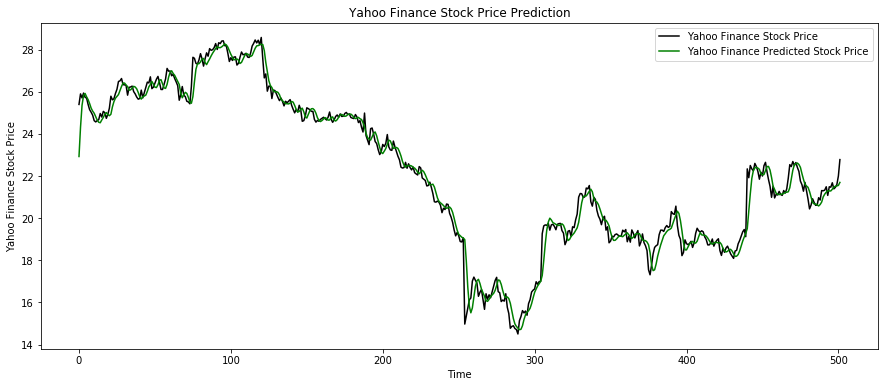

In [49]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6

plt.plot(real_stock_price, color = 'black', label = 'Yahoo Finance Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Yahoo Finance Predicted Stock Price')
plt.title('Yahoo Finance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Yahoo Finance Stock Price')
plt.legend()
plt.show()

In [42]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
test_set_rmse = (np.sqrt(mean_squared_error(real_stock_price, predicted_stock_price)))
test_set_r2 = r2_score(real_stock_price, predicted_stock_price)

In [43]:
print(test_set_rmse)

0.5048125514001949


In [48]:
print(test_set_r2)

0.9942564447
